# Time series Forecasting- SARIMA model 


### Impoting libraries 

In [1]:

import pandas as pd
import numpy as np
%matplotlib inline


from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders


from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")



### Import dataset 

In [2]:
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


### Exploring the dataset 

In [3]:
df

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7
...,...
2018-08-01,2019.1
2018-09-01,1992.5
2018-10-01,1984.3


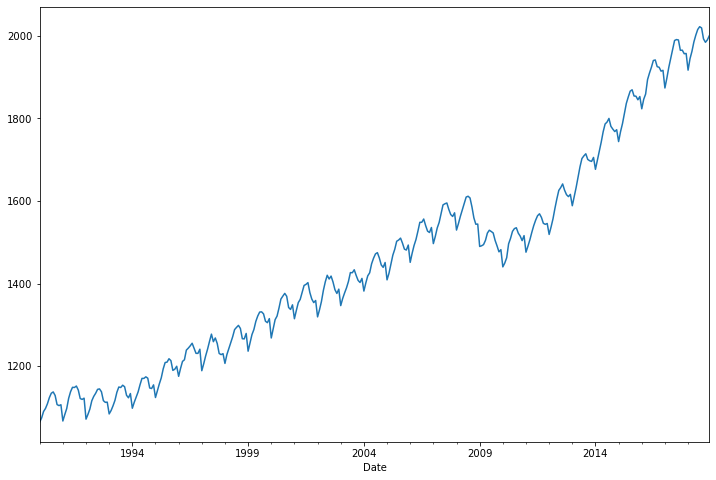

In [4]:
df['Employees'].plot(figsize=(12,8));




### Running an ETS Decomposition to check for seasonality 
an 'additive' model is used.

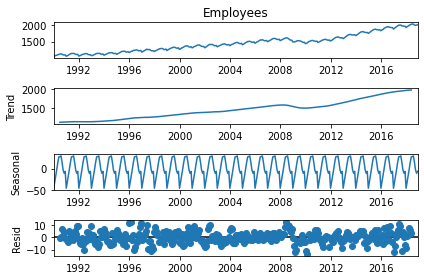

In [5]:
result=seasonal_decompose(df['Employees'],model='additive')
result.plot();

clear seasonality observed in the data 

###  Running autoarima to obtain recommended orders


In [6]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Thu, 20 Apr 2023   AIC                           2208.504
Time:                                      14:49:18   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9248      0.045     20.613      0.000       0.837       1.013
ma.L1         -0.9443      0.070    -13.542      0.000      -1.081      -0.808
ma.L2          0.1286      0.060      2.146      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    704.926      0.000       0.994       1.000
ma.S.L12      -0.7491      0.043    -17.348      0.000      -0.834      -0.665
sigma2        29.3011      1.718     17.054      0.000      25.934      32.669
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.47
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


###  Splitting the data into train/test sets
one year (12 records) for testing. 

In [7]:
nobs=12 
train, test = df[:-nobs], df[-nobs:]

In [8]:
test.tail()

,Employees
Date,
2018-08-01,2019.1
2018-09-01,1992.5
2018-10-01,1984.3
2018-11-01,1990.1
2018-12-01,2000.2


###  Fitting a SARIMA(1,1,2)(1,0,1,12) model to the training set

In [9]:
model= SARIMAX(train['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Thu, 20 Apr 2023   AIC                           2128.116
Time:                                      14:49:19   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9240      0.044     21.170      0.000       0.838       1.010
ma.L1         -0.9584      0.070    -13.778      0.000      -1.095      -0.822
ma.L2          0.1500      0.060      2.491      0.013       0.032       0.268
ar.S.L12       0.9973      0.001    731.029      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.168      0.000      -0.838      -0.666
sigma2        28.7641      1.684     17.083      0.000      25.464      32.064
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.31
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Obtaining predicted values

In [10]:
start=len(train)
end=len(train) + len(test) - 1 
predictions = results.predict(start,end,dynamic=False,typ='levels').rename('SARIMA 112,1,0,1,12')

### Plotting predictions against known values

<AxesSubplot:title={'center':'Prediction vs test values'}, xlabel='Date'>

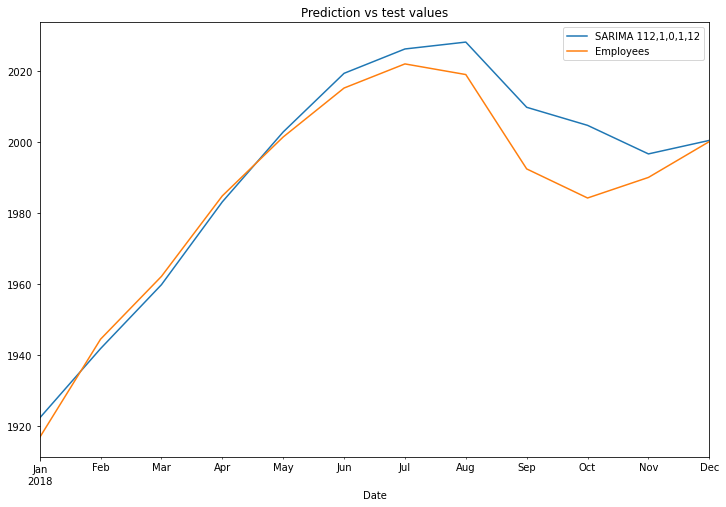

In [11]:
title = 'Prediction vs test values'
ax = predictions.plot(figsize=(12,8),legend=True, title=title)
test['Employees'].plot(legend=True)

### Evaluating the Model using MSE and RMSE metrics


In [12]:
mse = mean_squared_error(test['Employees'],predictions)
print (f'SARIMA (1,1,2)(1,0,1,12) MSE Error:{mse}')
rmse = rmse(test['Employees'],predictions)
print (f'SARIMA (1,1,2)(1,0,1,12) RMSE Error:{rmse}')

SARIMA (1,1,2)(1,0,1,12) MSE Error:77.63067734433234
SARIMA (1,1,2)(1,0,1,12) RMSE Error:8.810827279224826


In [13]:
#comparing the magnitude of the error(s) to the mean value of the observed feature 
df['Employees'].mean()

1452.5068965517255

###  Retraining the model on the full data and forecasting for a one year period

In [14]:
final_model= SARIMAX(df['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12))
final_result=final_model.fit()
forecast= final_result.predict(len(df),len(df)+11,typ='levels',dynamic=False).rename('SARIMA (1,1,2)(1,0,1,12) Forecast')

### Plotting the forecasted values alongside the original data


[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

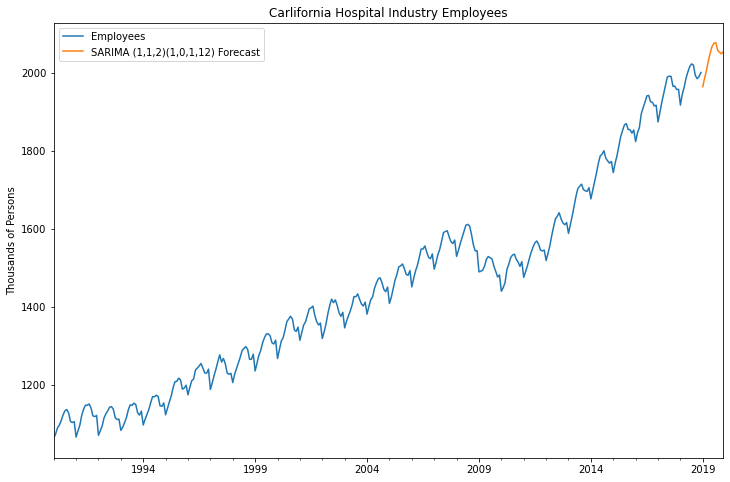

In [15]:
title = 'Carlifornia Hospital Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = df['Employees'].plot(legend=True,figsize=(12,8),title=title)
forecast.plot(legend=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
